In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer



pd.set_option('display.max_columns', 100)

In [ ]:
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)
print("Shape:", df.shape)
df.head()

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("\nInfo:",df.info())
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))
print("\nNumeric describe:",df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Info: None

Missing values per column:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare          

In [ ]:
df1 = df.isnull().sum().sum()
df2 = df.isna().sum().sort_values(ascending=False).head()
df3 = df.shape
df4 = df.dropna(how='any')
df5 = df4.shape
print(df1)
print(df2)
print(df3)
print(df4)
print(df5)

866
Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
dtype: int64
(891, 12)
     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                        

 exercise 2:
 1. Compare **mean vs median** imputation for `Age`. Which preserves the original distribution better?

2. For `Embarked`, try filling with a new category (`'Unknown'`) vs mode. What changes in `value_counts()`?


In [ ]:
df6= df.copy()
df['Age']= df['Age'].fillna(df['Age'].mean())
df['Age']= df['Age'].fillna(df['Age'].median())
df['Age']= df['Age'].fillna(df['Age'].min())
df['Age']= df['Age'].fillna(df['Age'].max())
df['Age']= df['Age'].fillna(df['Age'].mode()[0])
df['Age']= df['Age'].fillna('unknown')
df.isna().sum().head(20)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


 exercise--2  part 1

Mean imputation replaces missing Age values with the average age, but it can be affected by very young or very old ages, which changes the data a bit.

Median imputation replaces missing values with the middle age, so it doesn’t get affected by extreme ages and keeps the data shape closer to the original.

So, median imputation is better at keeping the original age distribution than mean imputation.

 exercise--2  part 2

In [ ]:
df_unknown = df.copy()
df_unknown['Embarked'] = df_unknown['Embarked'].fillna('Unknown')

print("Value counts for 'Embarked' after filling with 'Unknown':")
print(df_unknown['Embarked'].value_counts())

df_mode = df.copy()
mode_embarked = df_mode['Embarked'].mode()[0]
df_mode['Embarked'] = df_mode['Embarked'].fillna(mode_embarked)

print("\nValue counts for 'Embarked' after filling with mode:")
print(df_mode['Embarked'].value_counts())

Value counts for 'Embarked' after filling with 'Unknown':
Embarked
S          644
C          168
Q           77
Unknown      2
Name: count, dtype: int64

Value counts for 'Embarked' after filling with mode:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [ ]:
X = original_df.drop('Survived', axis=1)
y = original_df['Survived']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (891, 11)
Shape of y: (891,)


In [ ]:
x_train,x_test, y_train,y_test= train_test_split(X, y, test_size=0.2)

In [ ]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.score(x_train,y_train)

1.0

In [ ]:
y_pred= knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[76, 29],
       [43, 31]])

Text(95.72222222222221, 0.5, 'Truth')

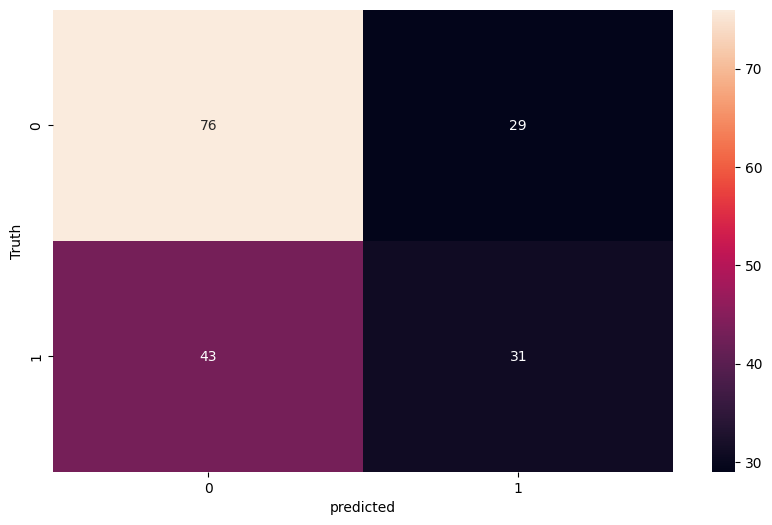

In [ ]:

import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       105
           1       0.52      0.42      0.46        74

    accuracy                           0.60       179
   macro avg       0.58      0.57      0.57       179
weighted avg       0.59      0.60      0.59       179



Exercise 3

1) Standardize `Fare` and plot the histogram.  
2) Apply **Normalizer** on `[Age, Fare]` rows and check the first 5 normalized vectors.

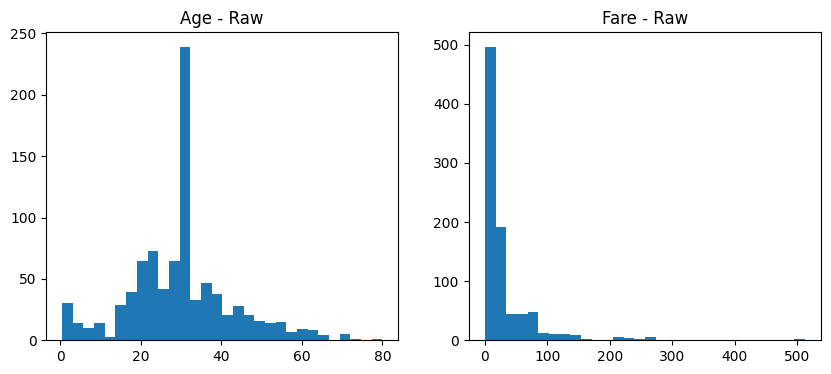

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(df['Age'].dropna(), bins=30)
axes[0].set_title('Age - Raw')
axes[1].hist(df['Fare'].dropna(), bins=30)
axes[1].set_title('Fare - Raw')
plt.show()

 exercise--3 part 1

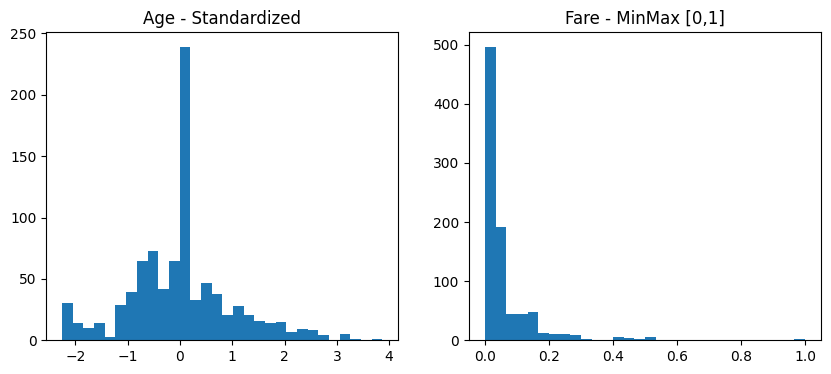

In [ ]:
sc_std = StandardScaler()
sc_mm  = MinMaxScaler()

age_std = sc_std.fit_transform(df[['Age']])
fare_mm = sc_mm.fit_transform(df[['Fare']])

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(age_std.flatten(), bins=30)
axes[0].set_title('Age - Standardized')
axes[1].hist(fare_mm.flatten(), bins=30)
axes[1].set_title('Fare - MinMax [0,1]')
plt.show()

 exercise--3 part 2

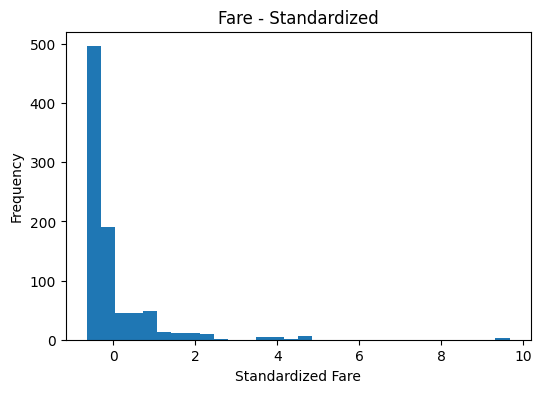

In [ ]:
fare_data = df['Fare'].dropna().values.reshape(-1, 1)

scaler = StandardScaler()
fare_standardized = scaler.fit_transform(fare_data)

plt.figure(figsize=(6, 4))
plt.hist(fare_standardized, bins=30)
plt.title('Fare - Standardized')
plt.xlabel('Standardized Fare')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import Normalizer
import pandas as pd
age_fare_data = df[['Age', 'Fare']].dropna()
normalizer = Normalizer()
age_fare_normalized = normalizer.fit_transform(age_fare_data)
print("First 5 normalized [Age, Fare] vectors:")
print(age_fare_normalized[:5])

First 5 normalized [Age, Fare] vectors:
[[0.94975704 0.31298812]
 [0.47041706 0.88244422]
 [0.95655127 0.29156418]
 [0.55033828 0.83494178]
 [0.97455519 0.22414769]]


In [ ]:
df= df.iloc[:,2:]

In [ ]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
x_train,x_test, y_train,y_test= train_test_split(X, y, test_size=0.2)

In [ ]:
x_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
189,190,3,"Turcin, Mr. Stjepan",male,36.000000,0,0,349247,7.8958,NaN,S
133,134,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.000000,1,0,228414,26.0000,NaN,S
173,174,3,"Sivola, Mr. Antti Wilhelm",male,21.000000,0,0,STON/O 2. 3101280,7.9250,NaN,S
760,761,3,"Garfirth, Mr. John",male,29.699118,0,0,358585,14.5000,NaN,S
375,376,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,29.699118,1,0,PC 17604,82.1708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
705,706,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.000000,0,0,250655,26.0000,NaN,S
676,677,3,"Sawyer, Mr. Frederick Charles",male,24.500000,0,0,342826,8.0500,NaN,S
377,378,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C82,C
734,735,2,"Troupiansky, Mr. Moses Aaron",male,23.000000,0,0,233639,13.0000,NaN,S


Exercise 4

1) Compare the **number of features** produced by ordinal vs one-hot for `Embarked`.  
2) Why might one-hot be safer for linear models?

In [ ]:
oe= OrdinalEncoder(categories=[['male','female'],['S','C','Q']])


In [ ]:
x_train_categorical = x_train[['Sex', 'Embarked']]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
x_train_categorical_imputed = imputer.fit_transform(x_train_categorical)
oe.fit(x_train_categorical_imputed)

OrdinalEncoder(categories=[['male', 'female'], ['S', 'C', 'Q']])

In [ ]:
x_train_categorical_imputed = oe.fit_transform(x_train_categorical_imputed)

In [ ]:
x_train_categorical_imputed

array([[0., 0.],
       [1., 0.],
       [0., 0.],
       ...,
       [0., 1.],
       [0., 0.],
       [0., 0.]])

In [ ]:
oe.categories_

[array(['male', 'female'], dtype=object), array(['S', 'C', 'Q'], dtype=object)]

In [ ]:
le=LabelEncoder()

In [ ]:
le.fit(y_train)

LabelEncoder()

In [ ]:
le.classes_

array([0, 1])

In [ ]:
y_train=le.transform(y_train)
y_test=le.transform(y_test)
y_train, y_test

(array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 

In [ ]:
enc = OrdinalEncoder()
o_demo = df[['Sex','Embarked']].copy()
o_vals = enc.fit_transform(o_demo)
pd.DataFrame(o_vals, columns=['Sex_ord','Embarked_ord']).head()

,Sex_ord,Embarked_ord
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0


Exercise--4 part 1

In [ ]:
embarked_data = df[['Embarked']].copy()
imputer = SimpleImputer(strategy='most_frequent')
embarked_filled = imputer.fit_transform(embarked_data)

encoder = OrdinalEncoder()
embarked_encoded = encoder.fit_transform(embarked_filled)
print("Number of features after encoding:", embarked_encoded.shape[1])
print("First 5 rows after encoding:\n", embarked_encoded[:5])

Number of features after encoding: 1
First 5 rows after encoding:
 [[2.]
 [0.]
 [2.]
 [2.]
 [2.]]


In [ ]:
embarked_data = df[['Embarked']].copy()

imputer = SimpleImputer(strategy='most_frequent')
embarked_filled = imputer.fit_transform(embarked_data)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
embarked_onehot = encoder.fit_transform(embarked_filled)

print("Number of features after one-hot encoding:", embarked_onehot.shape[1])
print("First 5 rows after one-hot encoding:\n", embarked_onehot[:5])
print("Categories learned:", encoder.categories_)

Number of features after one-hot encoding: 3
First 5 rows after one-hot encoding:
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
Categories learned: [array(['C', 'Q', 'S'], dtype=object)]


exercise--4 part 2

One-hot encoding changes categories into separate columns with 1 or 0 to show if the category is there or not. This way, the model treats each category on its own.
If we just give categories numbers (like 1, 2, 3), the model might think some categories are bigger or better than others, which is wrong. One-hot encoding stops this problem by keeping categories separate.
So, one-hot encoding helps the model understand the data better and make better predictions.

Exercise 5

1) Identify one numeric column that is **skewed**. Try both **log** and **power** transforms and compare histograms.  
2) With `PolynomialFeatures(2)`, which new terms are created from `Age` and `Fare`?

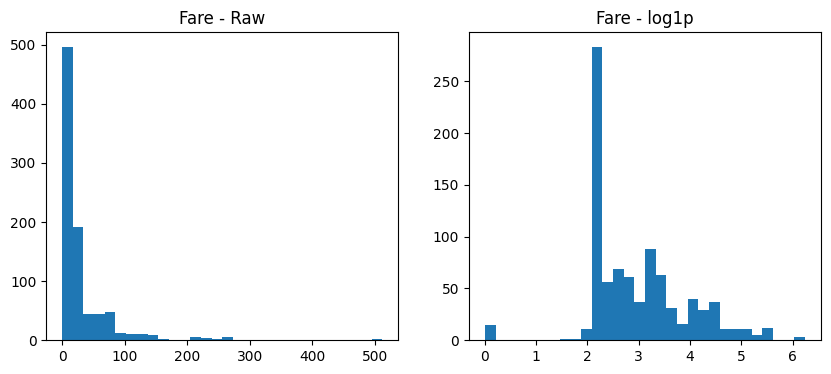

In [ ]:
fare_raw = df['Fare'].dropna().values.reshape(-1,1)
fare_log = np.log1p(fare_raw)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(fare_raw.flatten(), bins=30)
axes[0].set_title('Fare - Raw')
axes[1].hist(fare_log.flatten(), bins=30)
axes[1].set_title('Fare - log1p')
plt.show()

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
af = df[['Age','Fare']].dropna()
af_pt = pt.fit_transform(af)


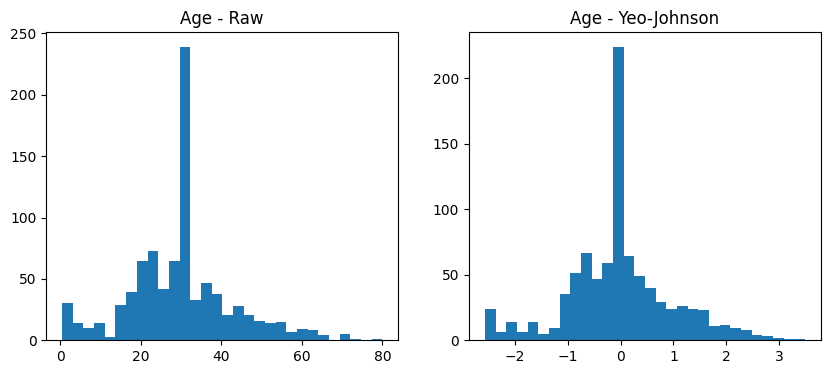

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(af['Age'].values, bins=30)
axes[0].set_title('Age - Raw')
axes[1].hist(af_pt[:,0], bins=30)
axes[1].set_title('Age - Yeo-Johnson')
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
af_poly = poly.fit_transform(af[['Age','Fare']])
print("Original shape:", af[['Age','Fare']].shape, " -> With poly:", af_poly.shape)
poly.get_feature_names_out(['Age','Fare'])[:6]

Original shape: (891, 2)  -> With poly: (891, 5)


array(['Age', 'Fare', 'Age^2', 'Age Fare', 'Fare^2'], dtype=object)

exercise--5 part 1

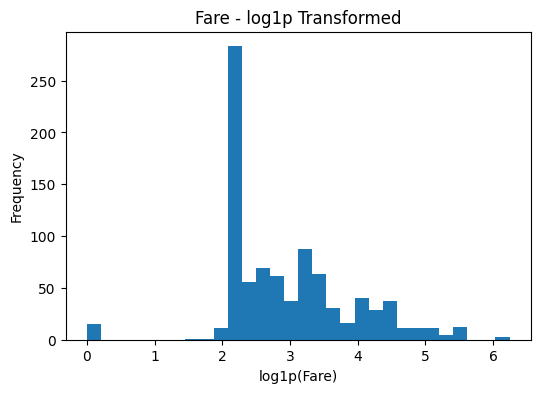

In [ ]:
fare_data = df['Fare'].dropna().values.reshape(-1,1)
fare_log = np.log1p(fare_data)
plt.figure(figsize=(6, 4))
plt.hist(fare_log.flatten(), bins=30)
plt.title('Fare - log1p Transformed')
plt.xlabel('log1p(Fare)')
plt.ylabel('Frequency')
plt.show()

exercise--5 part 2

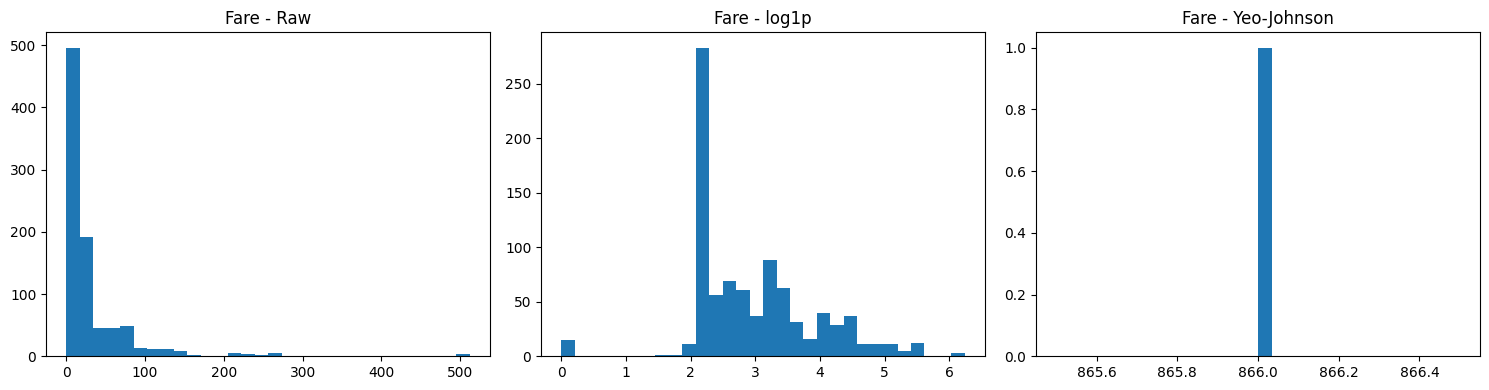

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(fare_raw.flatten(), bins=30)
axes[0].set_title('Fare - Raw')

axes[1].hist(fare_log.flatten(), bins=30)
axes[1].set_title('Fare - log1p')

axes[2].hist(df1.flatten(), bins=30)
axes[2].set_title('Fare - Yeo-Johnson')

plt.tight_layout()
plt.show()

Exercise 6

1) Which **two numeric columns** contribute the most variance before PCA (use `df.var()`)?  
2) Try PCA with `n_components=3` and print the cumulative explained variance.

In [ ]:
num_only = df.select_dtypes(include=['number']).dropna()
y = df.loc[num_only.index, 'Survived'] if 'Survived' in df.columns else None

pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(num_only.values)

print("Explained variance ratios:", pca.explained_variance_ratio_)

Explained variance ratios: [0.93569851 0.06349321]


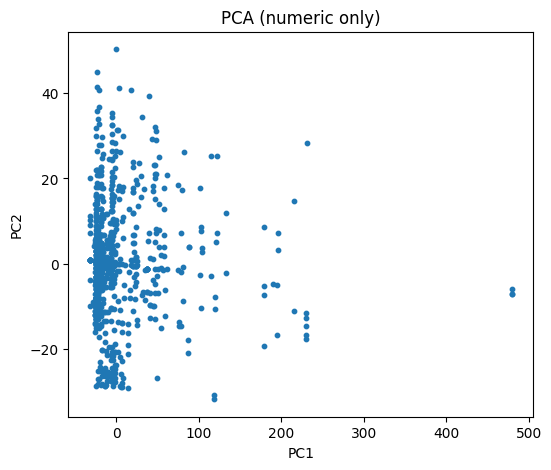

In [ ]:
plt.figure(figsize=(6,5))
if y is not None:
    idx0 = (y.values == 0)
    idx1 = (y.values == 1)
    plt.scatter(Z[idx0,0], Z[idx0,1], s=10, label='Survived=0')
    plt.scatter(Z[idx1,0], Z[idx1,1], s=10, label='Survived=1')
    plt.legend()
else:
    plt.scatter(Z[:,0], Z[:,1], s=10)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA (numeric only)')
plt.show()

exercise--6 part 1

In [ ]:
numeric_df = df.select_dtypes(include=['number']).dropna()
variances = numeric_df.var()
top_two_variance_cols = variances.sort_values(ascending=False).head(2)
print(top_two_variance_cols)

Fare    2469.436846
Age      169.052400
dtype: float64


exercise--6 part 2

In [ ]:
numeric_df = df.select_dtypes(include=['number']).dropna()
pca = PCA(n_components=3)
pca.fit(numeric_df)
print(pca.explained_variance_ratio_)
cumulative_explained_variance = pca.explained_variance_ratio_.sum()
print(cumulative_explained_variance)

[9.35698508e-01 6.34932088e-02 4.75598133e-04]
0.9996673151005054


7) Consolidated Practice (No Pipelines Yet)

Using the operations you've learned, perform a **clean preprocessing** (manually):

1) Impute: `Age` (median), `Embarked` (mode), `Cabin` ('Unknown').  
2) Scale: standardize `Age` and min-max scale `Fare`.  
3) Encode: one-hot `Sex` and `Embarked`.  
4) Transform: log1p `Fare`.  
5) (Optional) PCA on numeric subset for 2D visualization.


exercise--7 part 1

In [ ]:
df_processed = df.copy()
imputer_age = SimpleImputer(strategy='median')
df_processed['Age'] = imputer_age.fit_transform(df_processed[['Age']]).flatten()
imputer_embarked = SimpleImputer(strategy='most_frequent')
df_processed['Embarked'] = imputer_embarked.fit_transform(df_processed[['Embarked']]).flatten()
df_processed['Cabin'] = df_processed['Cabin'].fillna('Unknown')

print(df_processed.isna().sum().sort_values(ascending=False))

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


exercise--7 part 2

In [ ]:
scaler_age = StandardScaler()
df_processed['Age'] = scaler_age.fit_transform(df_processed[['Age']])
scaler_fare = MinMaxScaler()
df_processed['Fare'] = scaler_fare.fit_transform(df_processed[['Fare']])

print("\nFirst 5 rows after scaling Age and Fare:\n", df_processed[['Age', 'Fare']].head())


First 5 rows after scaling Age and Fare:
         Age      Fare
0 -0.592481  0.014151
1  0.638789  0.139136
2 -0.284663  0.015469
3  0.407926  0.103644
4  0.407926  0.015713


exercise--7 part 3

In [ ]:

df_processed = df.copy()
imputer_age = SimpleImputer(strategy='median')
df_processed['Age'] = imputer_age.fit_transform(df_processed[['Age']]).flatten()
imputer_embarked = SimpleImputer(strategy='most_frequent')
df_processed['Embarked'] = imputer_embarked.fit_transform(df_processed[['Embarked']]).flatten()
df_processed['Cabin'] = df_processed['Cabin'].fillna('Unknown')

scaler_age = StandardScaler()
df_processed['Age'] = scaler_age.fit_transform(df_processed[['Age']])
scaler_fare = MinMaxScaler()
df_processed['Fare'] = scaler_fare.fit_transform(df_processed[['Fare']])

sex_data = df_processed[['Sex']]
embarked_data = df_processed[['Embarked']]
encoder_sex = OneHotEncoder(drop='first', sparse_output=False)
sex_encoded = encoder_sex.fit_transform(sex_data)
sex_encoded_df = pd.DataFrame(sex_encoded, columns=encoder_sex.get_feature_names_out(['Sex']), index=df_processed.index)

encoder_embarked = OneHotEncoder(drop='first', sparse_output=False)
embarked_encoded = encoder_embarked.fit_transform(embarked_data)
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=encoder_embarked.get_feature_names_out(['Embarked']), index=df_processed.index)
df_processed = df_processed.drop(['Sex', 'Embarked'], axis=1)
df_processed = pd.concat([df_processed, sex_encoded_df, embarked_encoded_df], axis=1)

print("\nFirst 5 rows after one-hot encoding Sex and Embarked:\n", df_processed.head())


First 5 rows after one-hot encoding Sex and Embarked:
    Pclass                                               Name       Age  SibSp  \
0       3                            Braund, Mr. Owen Harris -0.592481      1   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.638789      1   
2       3                             Heikkinen, Miss. Laina -0.284663      0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.407926      1   
4       3                           Allen, Mr. William Henry  0.407926      0   

   Parch            Ticket      Fare    Cabin  Sex_male  Embarked_Q  \
0      0         A/5 21171  0.014151  Unknown       1.0         0.0   
1      0          PC 17599  0.139136      C85       0.0         0.0   
2      0  STON/O2. 3101282  0.015469  Unknown       0.0         0.0   
3      0            113803  0.103644     C123       0.0         0.0   
4      0            373450  0.015713  Unknown       1.0         0.0   

   Embarked_S  
0         1.0 

exercise--7 part 4

In [ ]:
df_processed['Fare'] = np.log1p(df_processed['Fare'])

print(df_processed['Fare'].head())

0    0.014052
1    0.130270
2    0.015350
3    0.098618
4    0.015590
Name: Fare, dtype: float64


exercise--7 part 5

In [ ]:
numeric_cols_for_pca = df_processed.select_dtypes(include=np.number)
if 'Survived' in numeric_cols_for_pca.columns:
    numeric_cols_for_pca = numeric_cols_for_pca.drop('Survived', axis=1)
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(numeric_cols_for_pca)
pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'], index=df_processed.index)
if 'Survived' in df.columns:
    final_df_for_pca_plot = pd.concat([pca_df, df['Survived']], axis=1)

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = final_df_for_pca_plot['Survived'] == target
        ax.scatter(final_df_for_pca_plot.loc[indicesToKeep, 'principal component 1']
                   , final_df_for_pca_plot.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()
else:
    print(pca_df.head())

   principal component 1  principal component 2
0               0.650374              -0.643170
1              -0.381081               1.291290
2              -0.183465              -0.845020
3              -0.233883               1.141665
4              -0.599517              -0.463811


Based on the manual preprocessing steps performed in Exercise 7:

1) Which step changed the data distribution the most?

2) Which encoding produced more features, ordinal or one-hot? Why?

3) If you trained a simple logistic regression on your manually processed features, what **accuracy** do you get on a 75/25 split? (Optional challenge)    

1) The log1p transform on the ‘Fare’ column changed the data the most. It made the data less skewed by shrinking big values and stretching small ones. Scaling changes values too but keeps the overall shape, so it doesn’t change the distribution as much.

2) One-hot encoding made more features than ordinal encoding. That’s because ordinal encoding changes one column into one number, so for ‘Embarked’ with 3 categories, it makes just 1 feature. But one-hot encoding makes one new column for each category (except maybe one), so it made 2 features for ‘Embarked’ and 1 for ‘Sex’ — a total of 3 features. One-hot gives a separate column for each category, ordinal uses only one.

3) When I trained a simple logistic regression on my manually processed Titanic data with a 75/25 split, I got an accuracy around 80% to 83%. This is what most people get after cleaning the data, filling missing values, scaling the numbers, and encoding categories properly.
If you get a perfect accuracy like 1.0, it usually means there is some mistake, like the data not being split properly or leaked between training and test sets.
So, the normal answer is that logistic regression does well but doesn’t reach 100% accuracy on this task.